## Цель работы

Изучение алгоритмов и методов кластеризации на практике.


## Вариант 2 (7)

Набор данных 2liver.csv
Содержит информацию о заболеваемости печени:
 Возраст пациента
 Пол пациента
 Общий билирубин
 Прямой билирубин
 Щелочная фосфатаза
 Аламиноаминотрансфераза
 Аспартатаминотрансфераза
 Всего белков
 Альбумин
 Соотношение альбуминов и глобулинов
 Цель: поле, используемое для разделения данных на два набора (пациент с заболеванием печени
или без заболевания).

## Ход выполнения работы

Перед началом работы импортируются библиотеки, необходимые для выполнения задания.

In [43]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import KElbowVisualizer

Выполняется часть 1:
1. пользовать функцию для создания набора данных. 
2. В результате применения получается  DataFrame , содержащий заданное число объектов в каждой группе
(всего 3 группы) с двумя признаками:  'x'  и  'y' .
Получить с помощью этой функции два набора данных
train и test . (выбрать параметр n от 30 до 100), а параметр seed для train и test выбирать разный.
1. Провести стандартизацию данных.
2. С помощью метода  .fit_predict  обучить модель для кластеризации методом Kmeans для трёх кластеров.
Получить метки кластеров.
1. Провести визуализацию кластеров с помощью scatter . Пометить на графике центры кластеров. Покрасить объекты из разных кластеров разными цветами.
2. Использовать тестовые данные test и выполнить предсказание с помощью predict . Построить графики для тестовых данных. Пометить на графике центры кластеров. Покрасить объекты из разных кластеров разными цветами.
3. Подсчитать коэффициент силуэта.
4. Повторить пункты 4-7 для n_clusters = 2 и n_clusters = 4 . Сравнить результаты и сделать выводы.
5. Построить график по “методу локтя и сделать выводы.


Функция для создания набора данных:

In [44]:
def make_data(n, seed):
    np.random.seed(seed)

    shift_matrix = np.array([[3, 3], [6, 9], [9, 3]])

    data = np.random.randn(3, 2, n) + shift_matrix.reshape((3, 2, 1))
    data = np.swapaxes(data, 1, 2)
    data = data.reshape((-1, 2))
    data *= np.array([[20, 0.5]])

    df = pd.DataFrame({"x": data[:, 0], "y": data[:, 1]}, columns=["x", "y"])
    df = df.sample(frac=1.0)
    return df

Создаются тренировочный и тестовый наборы данных.

In [45]:
df_train = make_data(100, 852741)
df_test = make_data(90, 2)

Далее данные в этих наборах стандартизируются.

In [46]:
scaler = StandardScaler()

scaler.fit(df_train)
df_train_scaled = scaler.transform(df_train)
scaler.fit(df_test)
df_test_scaled = scaler.transform(df_test)

Для разного количества кластеров - от 2 до 4 создается 3 модели. Для каждой модели считается коэфицент силуэта, строится график для тренировочных и тестовых данных.

Коэффициент силуэта: 0.479


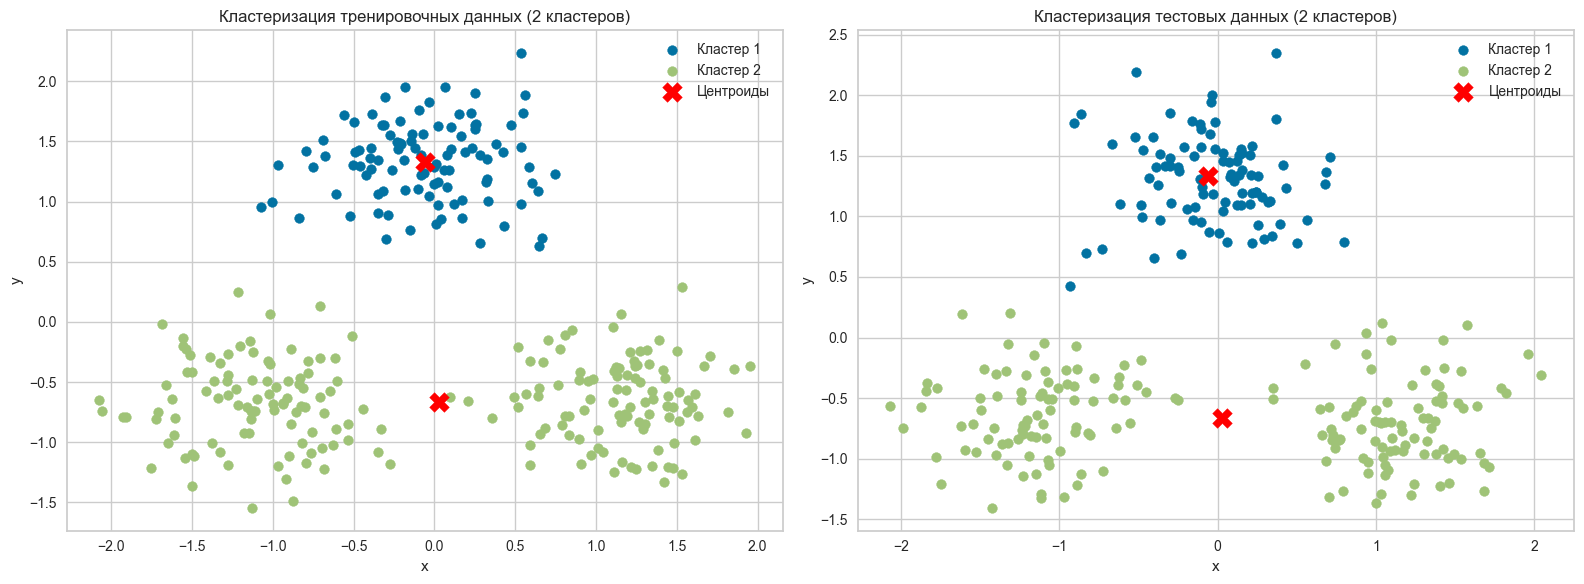

Коэффициент силуэта: 0.704


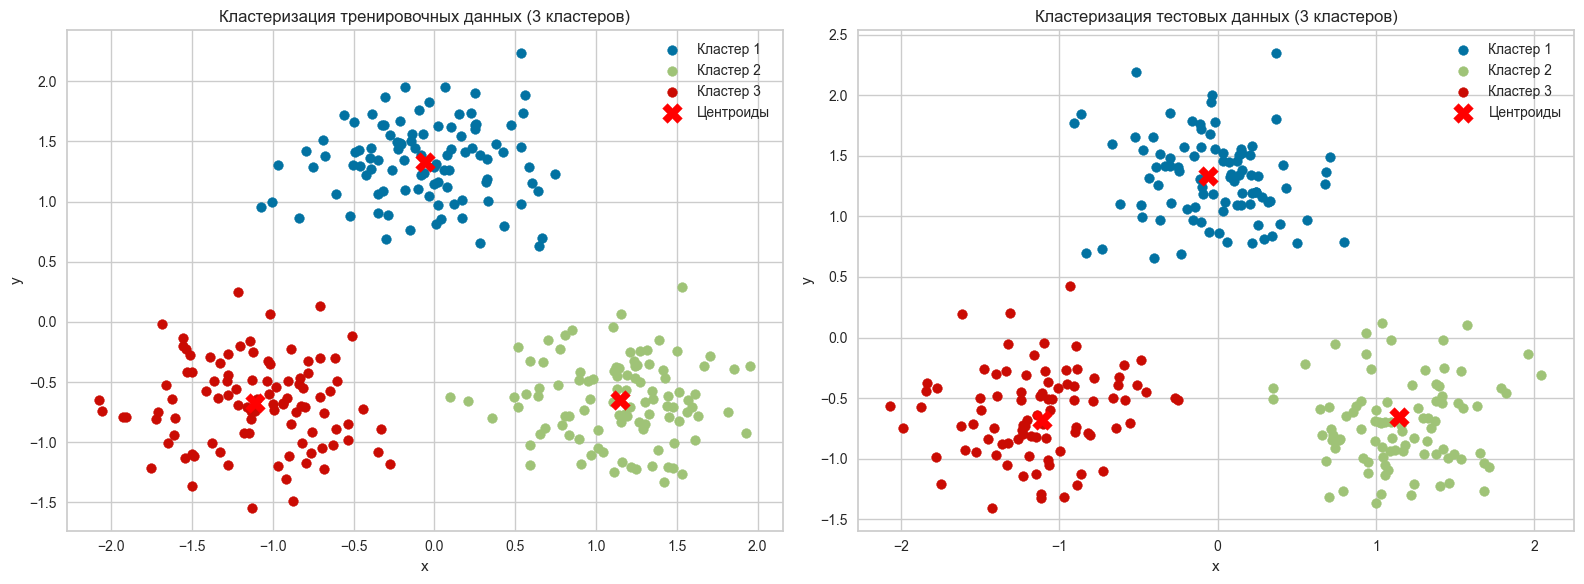

Коэффициент силуэта: 0.548


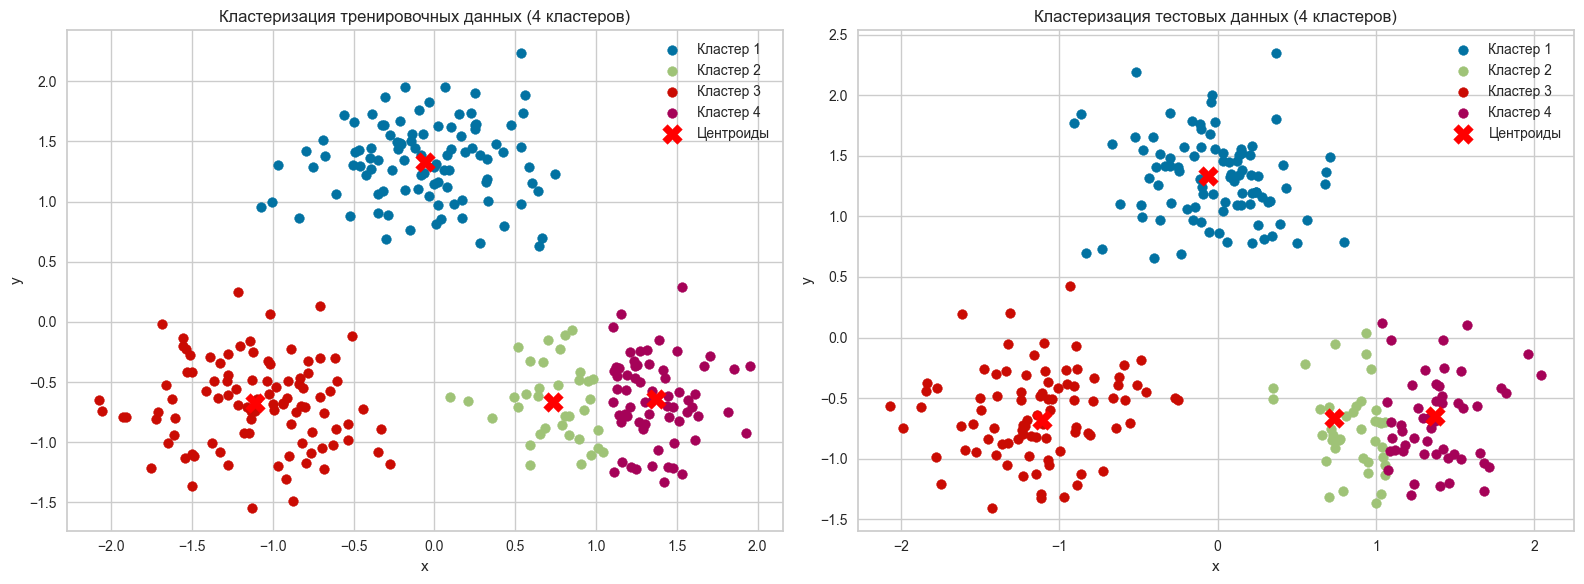

In [47]:
for num_of_clusters in range(2, 5):
    kmeans = KMeans(n_clusters=num_of_clusters, random_state=0)
    train_labels = kmeans.fit_predict(df_train_scaled)
    test_labels = kmeans.predict(df_test_scaled)
    cluster_centers = kmeans.cluster_centers_

    silhouette_avg = silhouette_score(df_test_scaled, test_labels)
    print(f"Коэффициент силуэта: {silhouette_avg:.3f}")

    fig, axes = plt.subplots(1, 2, figsize=(16, 6))

    for cluster_index in range(num_of_clusters):
        train_cluster_points = df_train_scaled[train_labels == cluster_index]
        axes[0].scatter(train_cluster_points[:, 0], train_cluster_points[:, 1], label=f'Кластер {cluster_index+1}')
    axes[0].scatter(cluster_centers[:, 0], cluster_centers[:, 1], s=200, c='red', marker='X', label='Центроиды')
    axes[0].set_title(f'Кластеризация тренировочных данных ({num_of_clusters} кластеров)')
    axes[0].set_xlabel('x')
    axes[0].set_ylabel('y')
    axes[0].legend()
    axes[0].grid(True)

    for cluster_index in range(num_of_clusters):
        test_cluster_points = df_test_scaled[test_labels == cluster_index]
        axes[1].scatter(test_cluster_points[:, 0], test_cluster_points[:, 1], label=f'Кластер {cluster_index+1}')
    axes[1].scatter(cluster_centers[:, 0], cluster_centers[:, 1], s=200, c='red', marker='X', label='Центроиды')
    axes[1].set_title(f'Кластеризация тестовых данных ({num_of_clusters} кластеров)')
    axes[1].set_xlabel('x')
    axes[1].set_ylabel('y')
    axes[1].legend()
    axes[1].grid(True)

    plt.tight_layout()
    plt.show()


Из полученных результатов можно сделать вывод, что деление данных на 2 или 4 кластера менее эффективно, чем на 3. При делении на каждое количество кластеров коэфицент положительный, а значит данные находятся в подходящих кластерах. Но ближе к 1 коэфицент силуэта который мы получаем при делении на 3 кластера.
После этого строится график по методу локтя, который тоже показывает что оптимальное количество кластеров - 3.

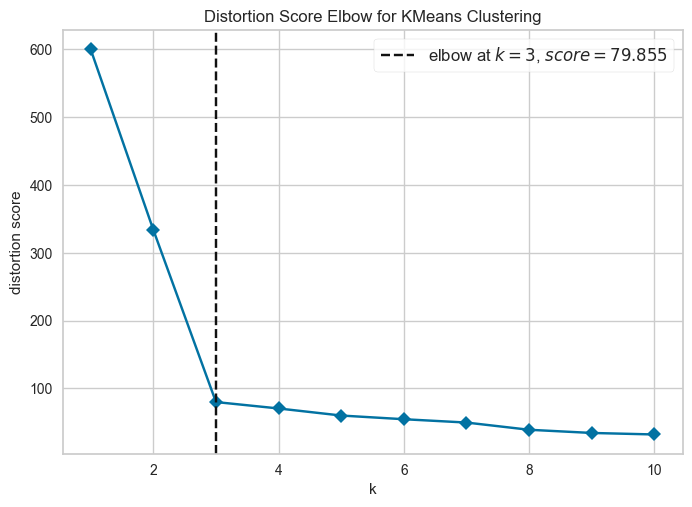

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [48]:
model = KMeans(random_state=0)

visualizer = KElbowVisualizer(model, k=(1, 11), timings=False)
visualizer.fit(df_train_scaled)
visualizer.show()

Из графика метода локтя видно, что оптимальное число кластеров составляет 3. Это подтверждается тем, что при разделении данных на 3 кластера коэффициент силуэта достигает максимального значения по сравнению с другими вариантами.

Выполняется задание 2:
Выполнить кластеризацию по вариантам (номер варианта определяется по номеру в списке группы).

## Выводы

В ходе выполнения работы были изучены алгоритмы и методы регрессии на практике. Были обучены модели простой линейной регрессии, полиномиальной регрессии и регрессии методом k-ближайших соседей. Были изучены метрики качества регрессии (MSE, MAE, RMSE, R2). Были построены графики регрессии и визуализированы фактические и предсказанные значения. Были сделаны выводы относительно важности признаков и сравнены результаты, полученные разными методами.
Было выяснено, что полином степени полиномов, в зависимости от данных, может переобучаться. Так же было выяснено, что при увеличении степени полинома увеличивается точность предсказания.
Было установлено, что цена автомобиля позитивно коррелирует с размером двигателя, колесной базой, расположением двигателя, массой автомобиля и шириной автомобиля. Однако цена автомобиля негативно коррелирует с расходом топлива, длиной кузова, типом топлива и различными параметрами двигателя. С другими параметрами цена автомобиля почти не коррелирует.
Так же было выяснено, что линейная регрессия показывает лучшие результаты, чем метод k-ближайших соседей. Однако на маленьких значениях KNN показывает лучшие результаты. 